<a href="https://colab.research.google.com/github/jbwenjoy/000545000/blob/jbw/CIS_545_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIS 5450 Final Project - Spring 2025**
## Group Member:
Yiyan Liang: edgarl@seas.upenn.edu
<br>Bowen Jiang: jbwenjoy@seas.upenn.edu
<br>Binglong Bao: binglong@seas.upenn.edu

# **1. Introduction and Background**

## **1.1 Problem Statement**
Airfare pricing in the U.S. domestic airline industry has long been a topic of interest due to its dynamic and opaque nature. From 1993 to 2024, the industry has undergone substantial changes including fluctuating fuel prices, shifting market competition, and evolving consumer behavior. These factors make it difficult for travelers to anticipate ticket prices and for airlines to optimize revenue through effective pricing strategies.

Despite the abundance of large-scale data, there remains a lack of comprehensive, data-driven analyses that systematically explore the relationship between these variables and airfare trends. One of our team members is planning to book a flight during a holiday period and is particularly interested in understanding what drives changes in ticket prices. This curiosity sparked our interest and motivated us to investigate whether historical data could reveal meaningful patterns that help consumers make more informed travel decisions.

## **1.2 Objective and Value Proposition**
The objective of this project is to conduct a thorough exploratory data analysis (EDA) of U.S. domestic airline fares from 1993 to 2024, and to develop predictive models that capture how different variables affect airfare pricing. The project integrates route and fare data with external economic indicators such as oil prices to uncover insights into airfare dynamics.

The primary goals are:

- **Understand Key Drivers of Pricing:** Investigate how factors like route distance, seasonality, fuel costs, airline competition, and passenger volume affect airfares.

- **Support Strategic Planning:** Provide insights to airline operators and policymakers for optimizing pricing strategies and understanding long-term market shifts.

- **Build a Predictive Model:** Develop regression models capable of forecasting average fares given known market and economic conditions.

The value proposition of this project lies in offering a systematic and scalable framework for analyzing complex fare-setting behavior across three decades. For consumers, it may lead to better fare predictions and smarter booking decisions. For industry stakeholders, it provides tools for data-informed pricing and long-term planning.

# **2. Data Loading and Preprocessing**



## **2.1 📊 Overview of the Dataset**
This project uses two complementary datasets to explore the relationship between airline ticket pricing and external economic factors, particularly oil prices. The integration of these datasets allows for a data-driven analysis of historical fare trends in the U.S. domestic airline market over the past three decades.
### **✈️ US Airline Flight Routes and Fares (1993–2024)**
**Source**: [Kaggle Dataset – US Airline Flight Routes and Fares (1993–2024)](https://www.kaggle.com/datasets/bhavikjikadara/us-airline-flight-routes-and-fares-1993-2024)

This dataset provides detailed information on airline flight routes, average fares, passenger volume, and carrier competition across the United States.

**Key Features:**
- **Year & Quarter**: Time identifiers for each record, from 1993 to 2024.
- **City1 & City2**: Names of origin and destination cities.
- **Airport Codes**: Origin and destination airport identifiers.
- **nsmiles**: Distance between airports in miles.
- **Passengers**: Number of passengers on each route.
- **Fare**: Average fare for the route.
- **Carrier Info**: Largest and lowest-fare carrier codes, their market shares, and corresponding fares.
- **Geographical Coordinates**: Latitude and longitude of both origin and destination cities.


The dataset enables long-term trend analysis of pricing behavior, route dynamics, and airline competition in the domestic travel sector.

---

### **🛢️ WTI Crude Oil Daily Prices**

Sourced from [DataHub](https://datahub.io/core/oil-prices), this dataset provides historical daily spot prices for West Texas Intermediate (WTI) crude oil.

**Key Features:**
- **Date**: Daily timestamps for each price record.
- **Price**: The WTI crude oil price in USD per barrel.

This dataset supports economic analysis and helps model the impact of fuel prices on airline operating costs.  

By combining historical airfare and fuel price data, this project aims to:
- Uncover patterns in ticket pricing.
- Investigate the impact of fuel cost fluctuations on airline fares.
- Improve prediction accuracy using external economic indicators.

This integrated approach allows for a richer understanding of pricing behavior and supports more informed consumer and industry decisions.


## **2.2 Data Loading**

In [ ]:
import os
import pandas as pd

In [ ]:
# Run this cell to mount your drive (you will be prompted to sign in)
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


❗ ONLY RUN ONE OF THE TWO CELLS BELOW, SEE COMMENTS

In [ ]:
"""
RUN THIS CELL IF YOU WANT TO LOAD CACHED DATASETS FROM GOOGLE DRIVE
DO NOT RUN THE NEXT CELL IF YOU DECIDE TO RUN THIS ONE!
"""

# If this is colab env, then mount the drive
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    from google.colab import drive
    drive.mount('/content/drive')

    data_path_in_drive = '/content/drive/MyDrive/CIS545-final/'
    flights_data = '/content/drive/MyDrive/CIS545-final/US Airline Flight Routes and Fares 1993-2024.csv'
    fuel_data = '/content/drive/MyDrive/CIS545-final/flat-ui__data-Fri Mar 28 2025.csv'
    kaggle_key = '/content/drive/MyDrive/CIS545-final/kaggle.json'
else:
    print('Not running on CoLab')
    data_path_in_drive = './'
    flights_data = './US Airline Flight Routes and Fares 1993-2024.csv'
    fuel_data = './flat-ui__data-Fri Mar 28 2025.csv'
    kaggle_key = './kaggle.json'

# Check if these files exists
file_paths = [
    (data_path_in_drive, "Directory"),
    (flights_data, "File"),
    (fuel_data, "File"),
    (kaggle_key, "File")
]
file_exists = True
for path, file_type in file_paths:
    if not os.path.exists(path):
        file_exists = False
        if file_type == "Directory":
            os.makedirs(path)
            print(f"Directory '{path}' created successfully.")
        else:
            print(f"{file_type} '{path}' does not exist.")

    else:
        print(f"{file_type} '{path}' exists.")


Running on CoLab
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Directory '/content/drive/MyDrive/CIS545-final/' exists.
File '/content/drive/MyDrive/CIS545-final/US Airline Flight Routes and Fares 1993-2024.csv' exists.
File '/content/drive/MyDrive/CIS545-final/flat-ui__data-Fri Mar 28 2025.csv' exists.
File '/content/drive/MyDrive/CIS545-final/kaggle.json' exists.


In [ ]:
"""
RUN THIS CELL IF YOU WANT TO DOWNLOAD ONLINE DATASETS FROM KAGGLE AND DATAHUB
DO NOT RUN THE PREVIOUS CELL IF YOU DECIDE TO RUN THIS ONE!
"""
try:
    file_exists
except NameError:
    file_exists = False
if not file_exists:
    # Create the kaggle directory and
    # (NOTE: Do NOT run this cell more than once unless restarting kernel)
    !mkdir ~/.kaggle

    # Read the uploaded kaggle.json file
    !cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

    # Download flights dataset (DO NOT CHANGE)
    !kaggle datasets download -d bhavikjikadara/us-airline-flight-routes-and-fares-1993-2024
    !unzip /content/us-airline-flight-routes-and-fares-1993-2024

    flights_data = 'US Airline Flight Routes and Fares 1993-2024.csv'
    flights_df = pd.read_csv(flights_data, low_memory=False)

    # Download WTI dataset (DO NOT CHANGE)
    url = "https://datahub.io/core/oil-prices/r/wti-daily.csv"
    oil_df = pd.read_csv(url)
    oil_df.to_csv("flat-ui__data-Fri Mar 28 2025.csv", index=False)
    fuel_data = 'flat-ui__data-Fri Mar 28 2025.csv'

## **2.3 Data Prepossessing**
### 🔍 Identified Data Challenges
- **Missing and Anomalous Values**: Both datasets contain potential null values and outliers that need to be addressed for accurate analysis.
- **Data Integration**: Airfare data is provided on a quarterly basis, while oil prices are reported daily. Proper aggregation and alignment are necessary to merge the two datasets effectively.

---

### 🛠️ Proposed Solutions

- **Outlier Detection and Filtering**: Use statistical thresholds to filter out unreasonable values (e.g., negative fares or extremely long flights).
- **Handling Missing Values**: Apply appropriate methods such as row filtering, median imputation, or interpolation to manage missing entries.
- **Quarter-Based Aggregation**: Convert daily oil price data into quarterly averages to match the structure of the airfare dataset.


In [ ]:
from scipy import stats

### **2.3.1 Flight Data**

In [ ]:
df_original = pd.read_csv(flights_data, low_memory=False)
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

In [ ]:
# Checking Duplicates
duplicates = df_original.duplicated().sum()
print(f'Duplicates: {duplicates}')

np.int64(0)

In [ ]:
df_original.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


In [ ]:
df_original.sample(3)

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
37633,Table 1a,1996,1,31650,30852,"Minneapolis/St. Paul, MN","Washington, DC (Metropolitan Area)",13487,12264,MSP,...,280.18,NW,0.7300,294.49,UA,0.1500,236.99,"Minneapolis/St. Paul, MN\n(44.977479, -93.264346)","Washington, DC (Metropolitan Area)\n(38.892062...",199611348712264MSPIAD
178981,Table 1a,2007,2,30977,32337,"Chicago, IL","Indianapolis, IN",13232,12339,MDW,...,78.96,WN,1.0000,78.96,WN,1.0000,78.96,"Chicago, IL\n(41.775002, -87.696388)","Indianapolis, IN\n(39.76845, -86.156212)",200721323212339MDWIND
238260,Table1a,2023,2,30194,31453,"Dallas/Fort Worth, TX","Houston, TX",11259,12266,DAL,...,170.69,WN,0.9986,170.79,WN,0.9986,170.79,NaN,NaN,202321125912266DALIAH


In [ ]:
print(df_original.shape)

# Handling Missing Values
df_clean = df_original.copy()
missing_values = df_clean.isnull().sum()
print(missing_values)
df_clean = df_clean.dropna()
df_clean = df_clean.dropna(axis=1)
df_clean = df_clean.drop_duplicates()

print(df_clean.shape)

(245955, 23)
(205189, 23)
(205189, 23)
(205189, 23)


❗ BE CAREFUL: YOU CAN ONLY RUN BELOW ONCE WITHOUT RERUNNING THE CELL ABOVE!

In [ ]:
"""
YOU CAN ONLY RUN THIS CELL ONCE!
OR YOU NEED TO RERUN THE CELL ABOVE THIS
"""

# Calculate Z-scores of each value in the DataFrame
z_scores = stats.zscore(df_clean.select_dtypes(include=['float64', 'int64']))

# Identify outliers
outlier_score = 10
df_outliers = df_clean[(z_scores > outlier_score).any(axis=1) | (z_scores < -outlier_score).any(axis=1)]
print(df_outliers.shape)

# Remove rows with outliers based on Z-score
df_clean = df_clean[(z_scores < outlier_score).all(axis=1) & (z_scores > -outlier_score).all(axis=1)]
print(df_clean.shape)
df_clean.sample(3)

(158, 23)
(205031, 23)


,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
68666,Table 1a,1996,4,31703,32457,"New York City, NY (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",12391,14771,ISP,...,327.21,AA,0.44,320.90,US,0.39,311.26,"New York City, NY (Metropolitan Area)\n(40.123...","San Francisco, CA (Metropolitan Area)\n(37.780...",199641239114771ISPSFO
116095,Table 1a,1996,1,30693,31454,"Nashville, TN","Orlando, FL",10693,13204,BNA,...,161.47,FL,0.54,177.78,J7,0.12,110.29,"Nashville, TN\n(36.166687, -86.779932)","Orlando, FL\n(28.538331, -81.378879)",199611069313204BNAMCO
59287,Table 1a,2010,3,32337,30852,"Indianapolis, IN","Washington, DC (Metropolitan Area)",12339,10821,IND,...,126.04,WN,0.56,132.04,FL,0.34,105.74,"Indianapolis, IN\n(39.76845, -86.156212)","Washington, DC (Metropolitan Area)\n(38.892062...",201031233910821INDBWI


### **2.3.2 Fuel Price Data**

In [ ]:
fuel_df_original = pd.read_csv(fuel_data, low_memory=False)
fuel_df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9876 entries, 0 to 9875
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9876 non-null   object 
 1   Price   9876 non-null   float64
dtypes: float64(1), object(1)
memory usage: 154.4+ KB


In [ ]:
# Checking Duplicates
duplicates = fuel_df_original.duplicated().sum()
print(f'Duplicates: {duplicates}')

np.int64(0)

In [ ]:
fuel_df_original.head()

,Date,Price
0,2025-03-24,69.46
1,2025-03-21,68.52
2,2025-03-20,68.55
3,2025-03-19,67.40
4,2025-03-18,67.49


In [ ]:
fuel_df_original.sample(3)

,Date,Price
761,2022-03-04,115.77
968,2021-05-07,64.96
7424,1995-08-21,18.26


In [ ]:
print(fuel_df_original.shape)

# Handling Missing Values
fuel_df_clean = fuel_df_original.copy()
fuel_df_clean = fuel_df_clean.dropna()
fuel_df_clean = fuel_df_clean.dropna(axis=1)
fuel_df_clean = fuel_df_clean.drop_duplicates()

print(fuel_df_clean.shape)

(9876, 2)
(9876, 2)


Since the fuel price data is very clean, we don't need further cleaning.

# **3. Exploratory Data Analysis (EDA)**

We primarily focused on visualizing data distributions to have a brief concept of the data ranges, and also the relationships between fare and possible deciding factors (fuel price, distance, passenger count, carrier type, etc) to understand possible correlations.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = df_clean.copy()
fuel_df = fuel_df_clean.copy()

## **3.1 Distribution of Fare, distance and fuel price**

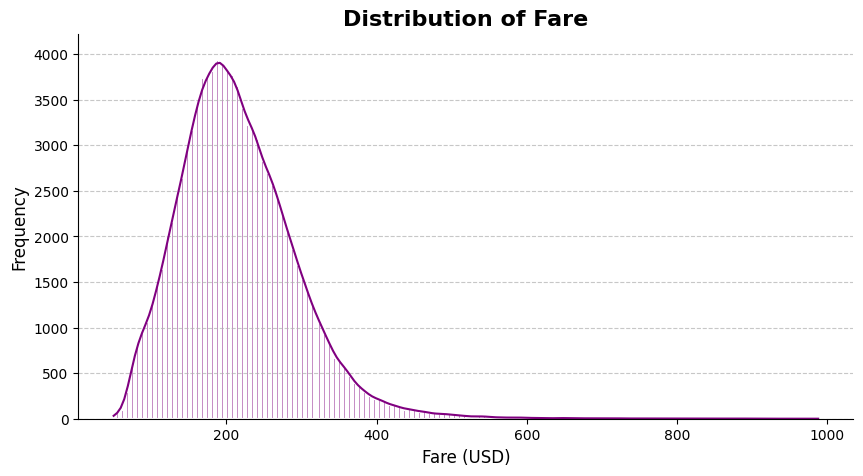

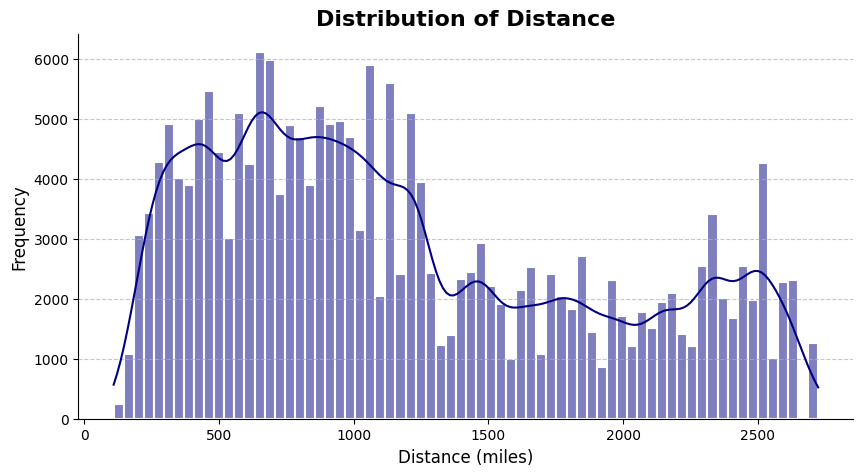

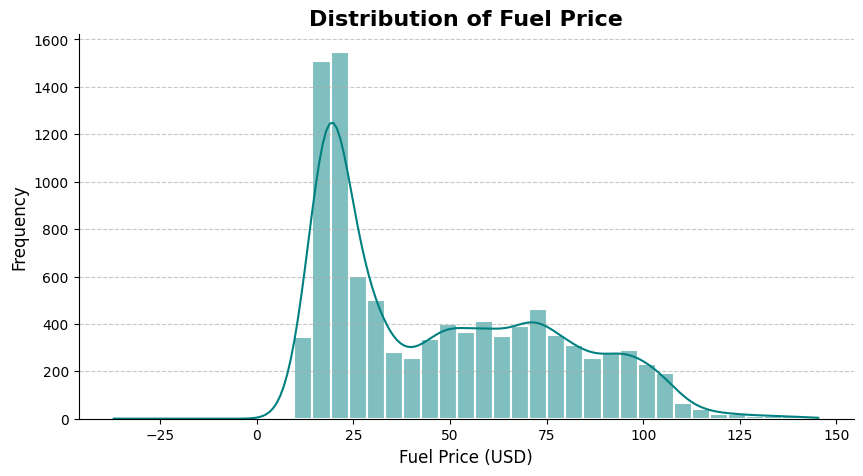

In [ ]:
# Distribution of fare
plt.figure(figsize=(10, 5))
sns.histplot(df['fare'], kde=True, color='#800080', edgecolor='white', linewidth=1.5)
plt.title('Distribution of Fare', fontsize=16, fontweight='bold')
plt.xlabel('Fare (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added gridlines for better readability
sns.despine()  # Remove top and right spines for a cleaner look
plt.show()

# Distribution of distance
plt.figure(figsize=(10, 5))
sns.histplot(df['nsmiles'], kde=True, color='#000080', edgecolor='white', linewidth=1.5)
plt.title('Distribution of Distance', fontsize=16, fontweight='bold')
plt.xlabel('Distance (miles)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

# Distribution of fuel price
plt.figure(figsize=(10, 5))
sns.histplot(fuel_df['Price'], kde=True, color='#008080', edgecolor='white', linewidth=1.5)
plt.title('Distribution of Fuel Price', fontsize=16, fontweight='bold')
plt.xlabel('Fuel Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

We can see that:

* Airfare centers around 200 USD, while there are extreme values, it's still very symmetrical.

* Distance range from about 200 miles to over 2500 miles, with 1500 miles serving as a dividing line. The distribution is fairly uniform both below and above 1,500 miles, but the average frequency in these two segments differs by about a factor of two.

* Fuel price ranges greatly over the years.

## **3.2 US Flight Fare and Distance**

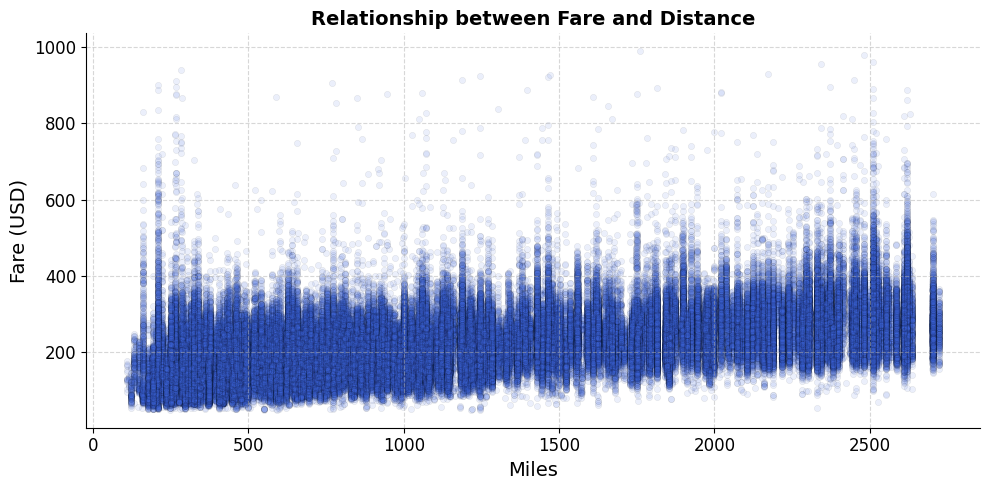

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='nsmiles', y='fare', data=df, alpha=0.1, color='royalblue', edgecolor='k', s=20)
plt.title('Relationship between Fare and Distance', fontsize=14, fontweight='bold')
plt.xlabel('Miles', fontsize=14)
plt.ylabel('Fare (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

From the plot:

* There is an approximately linear relationship between airfare and the distance of the route.

* The slope is small and the variance is very large. This aligns with our real-world experience that airfare can vary greatly.

## **3.3 US Flight Fare and Fuel Price over Time**

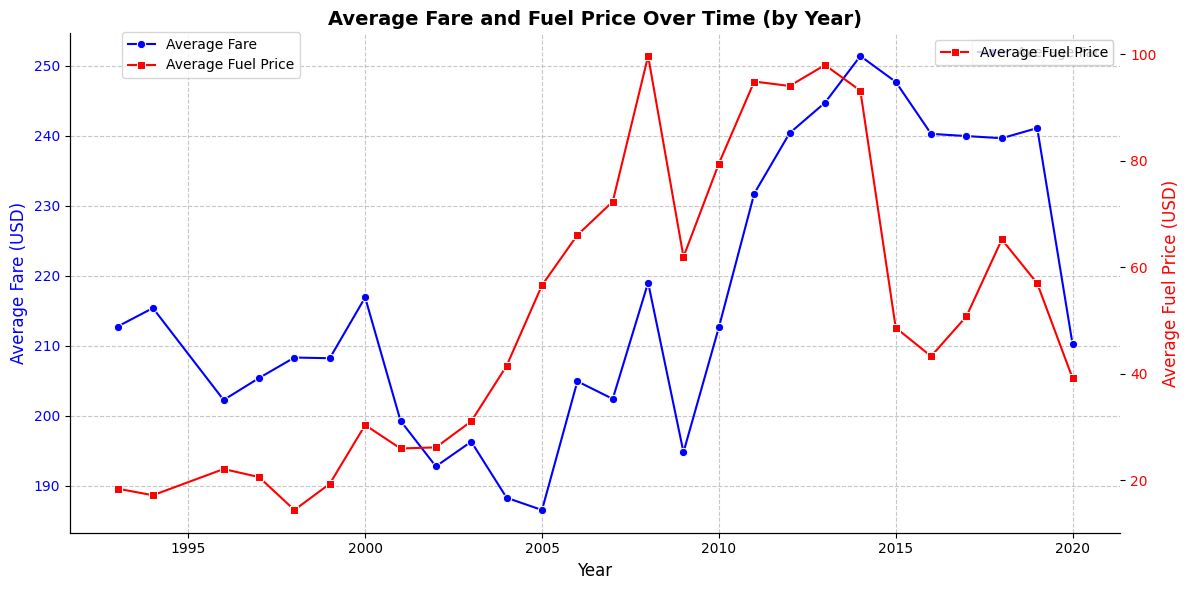

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


fuel_df['Date'] = pd.to_datetime(fuel_df['Date'])
fuel_df['Year'] = fuel_df['Date'].dt.year
avg_fuel_price_per_year = fuel_df.groupby('Year')['Price'].mean().reset_index()
avg_fare_per_year = df.groupby('Year')['fare'].mean().reset_index()

# Find common years between fare and fuel data
common_years = list(set(avg_fare_per_year['Year']) & set(avg_fuel_price_per_year['Year']))

# Filter data for common years
avg_fare_per_year = avg_fare_per_year[avg_fare_per_year['Year'].isin(common_years)]
avg_fuel_price_per_year = avg_fuel_price_per_year[avg_fuel_price_per_year['Year'].isin(common_years)]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Avr fare (ax1)
sns.lineplot(x='Year', y='fare', data=avg_fare_per_year, marker='o', color='blue', ax=ax1, label='Average Fare')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Average Fare (USD)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# Avr fuel price (ax2)
ax2 = ax1.twinx()
sns.lineplot(x='Year', y='Price', data=avg_fuel_price_per_year, marker='s', color='red', ax=ax2, label='Average Fuel Price')
ax2.set_ylabel('Average Fuel Price (USD)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')


ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color('red')
plt.title('Average Fare and Fuel Price Over Time (by Year)', fontsize=14, fontweight='bold')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.95))
sns.despine()
plt.tight_layout()

plt.show()

From the plot:

* We can see some correlation between flight ticket fare and fuel price, but averging by year is somewhat rough.

* Below we also plot base on quarterly average, and we can see that the fluctuations of the two are more obvious.

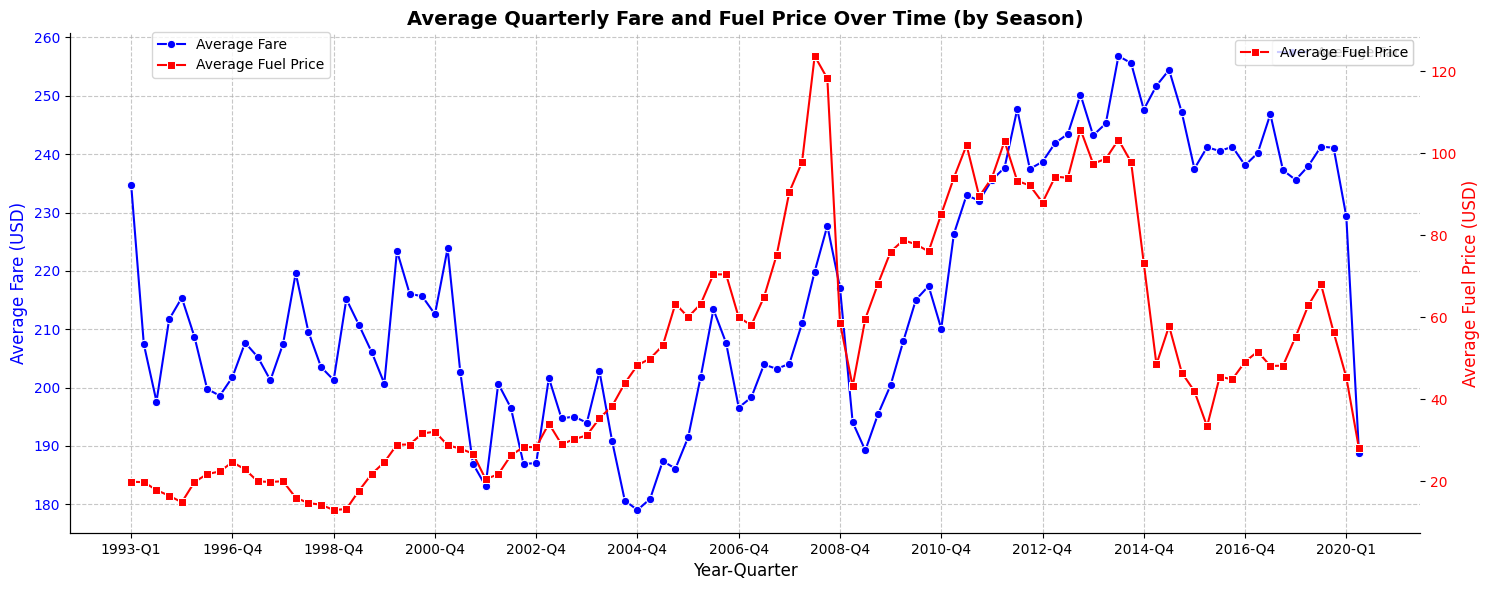

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fuel_df['Date'] = pd.to_datetime(fuel_df['Date'])
fuel_df['Year'] = fuel_df['Date'].dt.year
fuel_df['Quarter'] = fuel_df['Date'].dt.quarter
avg_fuel_price_per_quarter = fuel_df.groupby(['Year', 'Quarter'])['Price'].mean().reset_index()

avg_fare_per_quarter = df.groupby(['Year', 'quarter'])['fare'].mean().reset_index()
avg_fare_per_quarter = avg_fare_per_quarter.rename(columns={'quarter': 'Quarter'})

# Merge and filter data for common quarters
merged_df = pd.merge(avg_fare_per_quarter, avg_fuel_price_per_quarter, on=['Year', 'Quarter'], how='inner')
merged_df['Year-Quarter'] = merged_df['Year'].astype(str) + '-Q' + merged_df['Quarter'].astype(str)

fig, ax1 = plt.subplots(figsize=(15, 6))

# Avr flight fare (ax1)
sns.lineplot(x='Year-Quarter', y='fare', data=merged_df, marker='o', color='blue', ax=ax1, label='Average Fare')
ax1.set_xlabel('Year-Quarter', fontsize=12)
ax1.set_ylabel('Average Fare (USD)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# Avr fuel price (ax2)
ax2 = ax1.twinx()
sns.lineplot(x='Year-Quarter', y='Price', data=merged_df, marker='s', color='red', ax=ax2, label='Average Fuel Price')
ax2.set_ylabel('Average Fuel Price (USD)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add solid line to the right spine of ax2
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color('red')

plt.title('Average Quarterly Fare and Fuel Price Over Time (by Season)', fontsize=14, fontweight='bold')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.95))

plt.xticks(rotation=45)
ax1.xaxis.set_major_locator(plt.MaxNLocator(15)) # Maximum num of x labels

# Improve aesthetics
sns.despine()
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

## **3.4 US Flight Fare and Passenger Count**

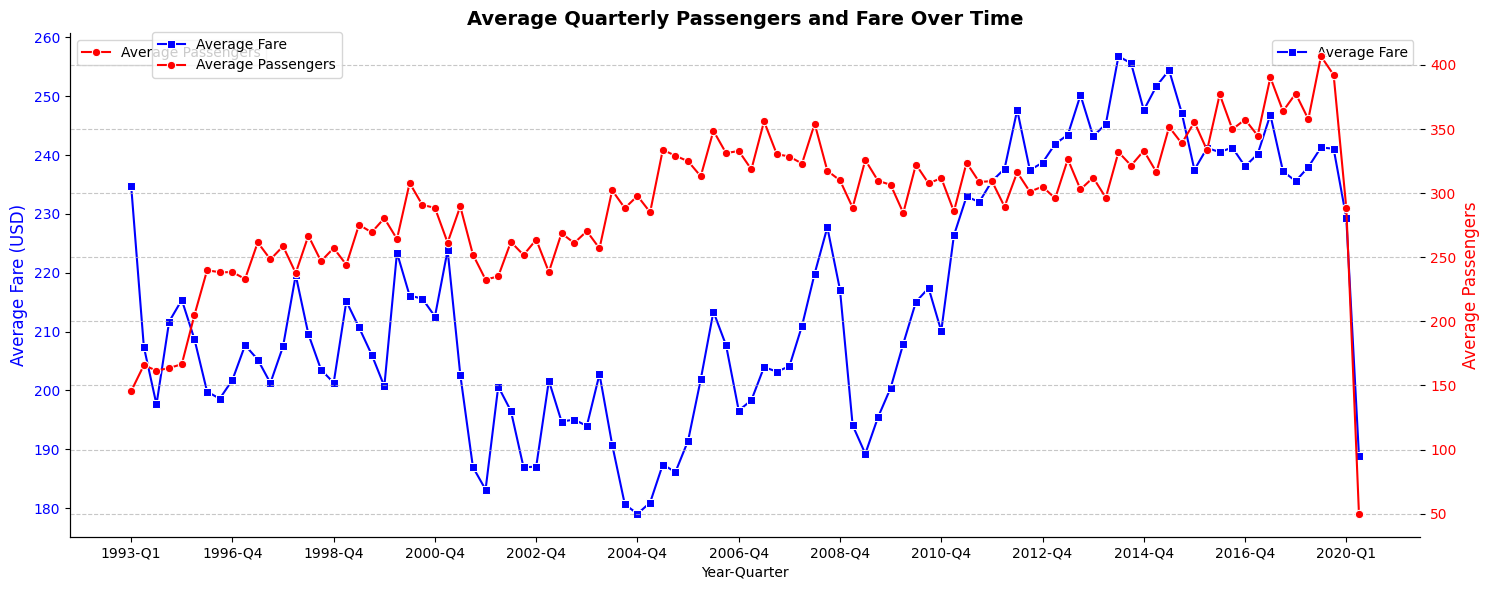

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

avg_passengers_per_quarter = df.groupby(['Year', 'quarter'])['passengers'].mean().reset_index()
avg_fare_per_quarter = df.groupby(['Year', 'quarter'])['fare'].mean().reset_index()

avg_passengers_per_quarter = avg_passengers_per_quarter.rename(columns={'quarter': 'Quarter'})
avg_fare_per_quarter = avg_fare_per_quarter.rename(columns={'quarter': 'Quarter'})

merged_df = pd.merge(avg_passengers_per_quarter, avg_fare_per_quarter, on=['Year', 'Quarter'], how='inner')
merged_df['Year-Quarter'] = merged_df['Year'].astype(str) + '-Q' + merged_df['Quarter'].astype(str)


fig, ax1 = plt.subplots(figsize=(15, 6))
sns.lineplot(x='Year-Quarter', y='fare', data=merged_df, marker='s', color='blue', ax=ax1, label='Average Fare')
ax1.set_ylabel('Average Fare (USD)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
sns.lineplot(x='Year-Quarter', y='passengers', data=merged_df, marker='o', color='red', ax=ax2, label='Average Passengers')
ax2.set_xlabel('Year-Quarter', fontsize=12)
ax2.set_ylabel('Average Passengers', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(True, linestyle='--', alpha=0.7)

ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color('red')

plt.title('Average Quarterly Passengers and Fare Over Time', fontsize=14, fontweight='bold')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.95))
plt.xticks(rotation=45)
ax1.xaxis.set_major_locator(plt.MaxNLocator(15))
sns.despine()
plt.tight_layout()

plt.show()

From the plot:

* Looks like there isn't a strong correlation between flight fare and passenger counts.

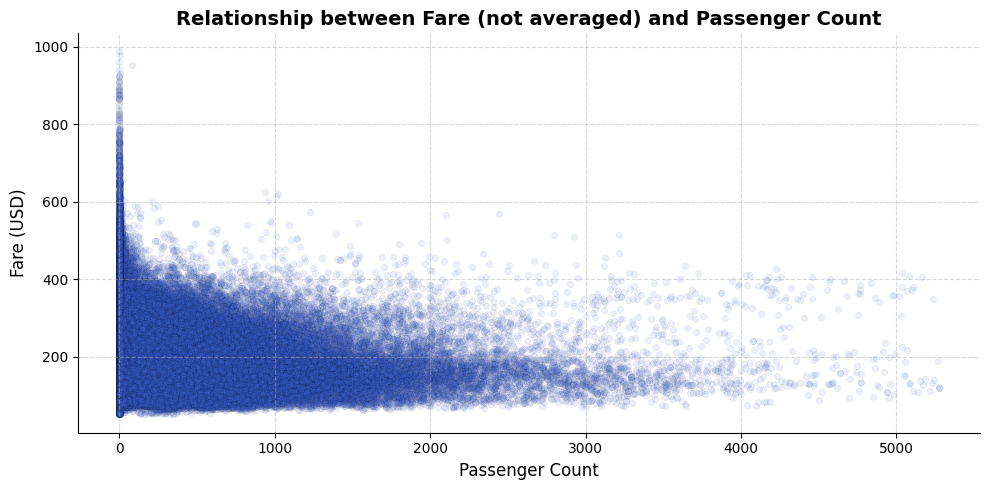

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='passengers', y='fare', data=df, alpha=0.1, color='royalblue', edgecolor='k', s=20)
plt.title('Relationship between Fare (not averaged) and Passenger Count', fontsize=14, fontweight='bold')
plt.xlabel('Passenger Count', fontsize=12)
plt.ylabel('Fare (USD)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

From the plot:

* We can see that the fares are more stable when there is a high passenger volume on a route.

## **3.5 US Flight Fare and Carrier Type for Same Routes**

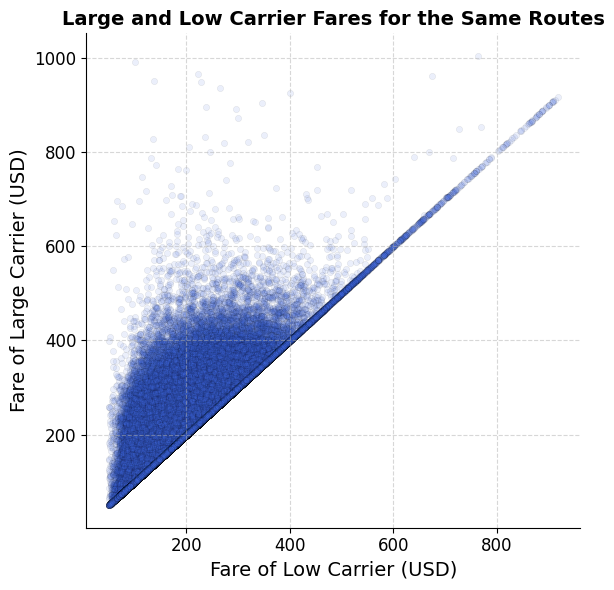

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='fare_low', y='fare_lg', data=df, alpha=0.1, color='royalblue', edgecolor='k', s=20)
plt.title('Large and Low Carrier Fares for the Same Routes', fontsize=14, fontweight='bold')
plt.xlabel('Fare of Low Carrier (USD)', fontsize=14)
plt.ylabel('Fare of Large Carrier (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

From this plot:

* We can roughly see that for air tickets between about 100-300 USD, the fares of different carriers vary greatly.

* The differences become much smaller after 300 USD.

# **4. Modeling**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import TransformerMixin, BaseEstimator

In [ ]:
df = df_clean.copy()
df['quaters'] = df['quarter'].astype(int) + (df['Year'].astype(int) - 2000) * 4
new_df = df[['fare', 'nsmiles', 'quaters']].dropna()

X = new_df[['nsmiles', 'quaters']]
y = new_df['fare']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
log_transformer = FunctionTransformer(np.log1p, inverse_func=np.expm1, validate=True)

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', LinearRegression()),
])

pipe.fit(X_train, y_train)
print(f"R^2 socre: {pipe.score(X_test, y_test)}")
print(f"MSE socre: {mean_squared_error(y_test, pipe.predict(X_test))}")
print(f"model intercept: {pipe.named_steps['model'].intercept_}")
print(f"model coefficients: {pipe.named_steps['model'].coef_}")

def plot_prediction(model,X_test, y_test):
    y_test_pred = model.predict(X_test)
    # use plotly to plot y_train_pred and y_test_pred vs y_train and y_test
    fig = go.Figure()
    # control figure size
    fig.update_layout(width=800, height=800)
    fig.add_trace(go.Scatter(x=y_test, y=y_test_pred, mode='markers', name='test'))
    min_val = min(y_test.min(), y_test_pred.min())
    max_val = max(y_test.max(), y_test_pred.max())
    fig.update_xaxes(range=[min_val - 50, max_val + 50])
    fig.update_yaxes(range=[min_val - 50, max_val + 50])
    # add title and axis labels
    fig.update_layout(title='Prediction vs Actual',
                    xaxis_title='Actual',
                    yaxis_title='Prediction')
    fig.add_trace(go.Scatter(
                    x=[min_val, max_val],
                    y=[min_val, max_val],
                    mode='lines',
                    name='Ideal (y = x)',
                    line=dict(color='red', dash='dash')
    ))
    fig.show()
    return



# sample some points from X_test and y_test
X_test_sample = X_test.sample(100)
y_test_sample = y_test.loc[X_test_sample.index]
# plot the prediction
plot_prediction(pipe, X_test_sample, y_test_sample)



R^2 socre: 0.2851182399517178
MSE socre: 4272.324708278707
model intercept: 133.59777503100077
model coefficients: [146.85458209  42.98876133]


As we can see, the baseline linear regression model has a very low R-squared value. This means that the model is not a good fit for the data.
We would like to further improve the performance by :
1. Adding more features, such as dealing with the categorical features and using the one-hot encoding technique.
2. Using more advanced machine learning algorithms, such as **kernel regression** and **gradient boosting trees**. These algorithms are designed to handle complex relationships between the features and the target variable. For example, kernel regression uses a kernel function to map the input features to a higher-dimensional space, while gradient boosting trees use a series of decision trees to build a strong predictive model. These algorithms can capture more complex relationships between the features and the target variable, which can lead to better performance than linear regression does.
3. Tuning the hyperparameters of the machine learning algorithms to improve their performance.

# **5. Project Management**
### 🗓️ Timeline & Milestones
| 📌 Task                                | 🗓️ Deadline | ✅ Status     | 💬 Notes |
|----------------------------------------|-------------|---------------|---------|
| Data acquisition and initial cleaning  | April 5     | ✅ Completed  | All raw data sources merged and cleaned |
| Exploratory Data Analysis (EDA)        | April 10    | ✅ Completed  | Key visuals and early insights generated |
| Baseline regression model              | April 12    | ✅ Completed  | Linear regression used as a baseline |
| Advanced model training (RF, XGBoost)  | April 20    | 🟡 In progress| Random Forest currently being tuned |
| Model evaluation and result visualization | April 25 | ⏳ Upcoming   | Will compare models using R² and RMSE |
| Final report writing and presentation  | April 30    | ⏳ Upcoming   | We’ll prepare slides, summary, and submit final deliverables |

### 📈 Progress Tracking

We are using a shared Google Colab and GitHub repository to:
- Track task completion status
- Share code updates and experiment logs
- Collaboratively edit the final presentation and written report

# **6. Hypothesis Testing**
To further validate our insights, we plan to conduct statistical hypothesis testing on key factors that may influence airfare pricing. The following hypotheses are proposed:

1. **Competition Hypothesis**  
   - **Null Hypothesis (H₀):** The level of market competition on a route has no significant correlation with average airfare.  
   - **Testing Method:** Correlation analysis and significance testing of regression coefficients will be used to evaluate the impact of competition intensity on pricing.

2. **Seasonality Hypothesis**  
   - **Null Hypothesis (H₀):** Seasonal variations in airfare do not differ significantly across routes with varying travel distances.  
   - **Testing Method:** Two-way ANOVA (Analysis of Variance) will be applied to examine the interaction effect between seasonality and route distance categories on airfare.

3. **Fuel Price Impact Hypothesis**  
   - **Null Hypothesis (H₀):** The influence of fuel price fluctuations on airfare does not vary significantly across different types of flight routes (e.g., short-haul vs. long-haul).  
   - **Testing Method:** Panel data regression analysis will be used to assess differential impacts of fuel price changes across route types over time.